# Planar Flows

**Goal:** Gain some intuition by looking at the effect of the planar and radial flow based models on the unit Gaussian and Uniform distributions.

I.e, I want to reproduce Fig 1 from [Variational Inference with Normalizing Flows](https://arxiv.org/abs/1505.05770).

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
mu = np.zeros(2)
cov = np.array([[1,0],[0,1]])

q0 = np.random.multivariate_normal(mu,cov,size=int(1e5))

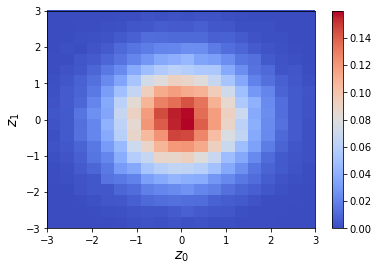

In [33]:
plt.hist2d(q0[:,0],q0[:,1],bins=20,range=[(-3,3),(-3,3)],
           cmap='coolwarm',normed=True)

plt.colorbar()

plt.xlabel('$z_1$',fontsize=14)
plt.ylabel('$z_2$',fontsize=14)

plt.show()

ButI'm not sure if this is the way I want to be thinking about it, maybe I want to save the pdf instead of sampling points from the distribution?

In [54]:
x = np.linspace(-3,3,100)
y = np.linspace(-3,3,100)

X, Y = np.meshgrid(x,y)

In [99]:
q0 = lambda (v): np.exp(-0.5 * np.matmul(np.matmul((v-mu).T,np.linalg.inv(cov)),v-mu)) / (2*np.pi*np.sqrt(np.linalg.det(cov)))

In [110]:
z0 = np.array([q0(np.array([xi,yi])) for xi,yi in zip(np.ravel(X), np.ravel(Y))])
Z0 = z.reshape(X.shape)

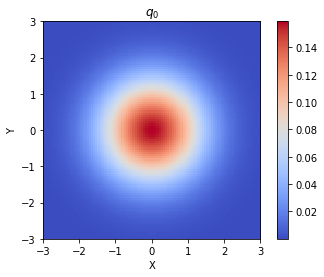

In [216]:
fig,ax = plt.subplots()

plt.imshow(Z0.T,extent=[-3,3,-3,3],cmap="coolwarm")

ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title('$q_0$')
plt.colorbar()

plt.show()

Ok, this looks *so* much nicer, I think this is the *way we want to go*!

### First linear transformation

In [335]:
w1 = np.array([10,0])
b1 = 0
u1 = np.array([-0.15,0])

In [336]:
sigmoid = lambda x: 1 / ( 1 + np.exp(-x))
sig_deriv = lambda x: sigmoid(x) * (1 - sigmoid(x))

In [337]:
scale1 = lambda v: 1 / np.linalg.det(np.identity(2) + sig_deriv(np.dot(w1,v)+b1)*np.outer(w1,u1))

z1 = np.array([zi * scale1(np.array([xi,yi])) for xi,yi,zi in zip(np.ravel(X), np.ravel(Y),np.ravel(Z))])
Z1 = z1.reshape(X.shape)

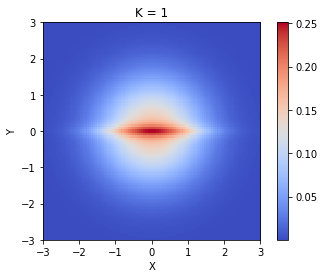

In [338]:
fig,ax = plt.subplots()

plt.imshow(Z1.T,extent=[-3,3,-3,3],cmap="coolwarm")

ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title('K = 1')
plt.colorbar()

plt.show()

**To do:** I really think I should write out the equations in 2d for how these densities transform into each other.

In [339]:
w2 = np.array([0,10])
b2 = 0
u2 = 5*np.array([1,1])

scale2 = lambda v: 1 / np.linalg.det(np.identity(2) + sig_deriv(np.dot(w2,v)+b2)*np.outer(w2,u2))

z2 = np.array([zi * scale2(np.array([xi,yi])) for xi,yi,zi in zip(np.ravel(X), np.ravel(Y),np.ravel(Z1))])
Z2 = z2.reshape(X.shape)

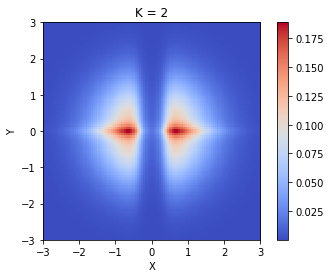

In [340]:
fig,ax = plt.subplots()

plt.imshow(Z2.T,extent=[-3,3,-3,3],cmap="coolwarm")

ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title('K = 2')
plt.colorbar()

plt.show()

- increasing the scale of u2 shifts the peaks away from each other